In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [ ]:
microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [ ]:
microsoft.shape

(1259, 8)

In [ ]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
microsoft.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


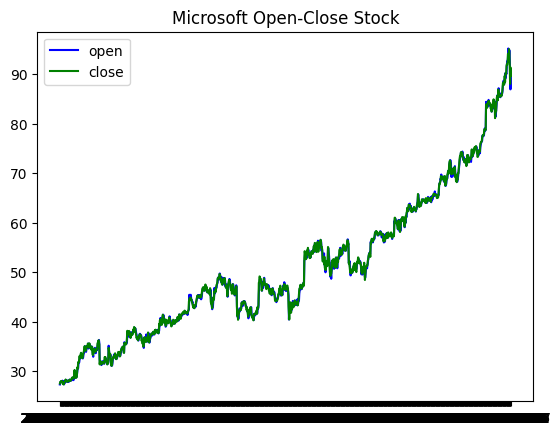

In [ ]:
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

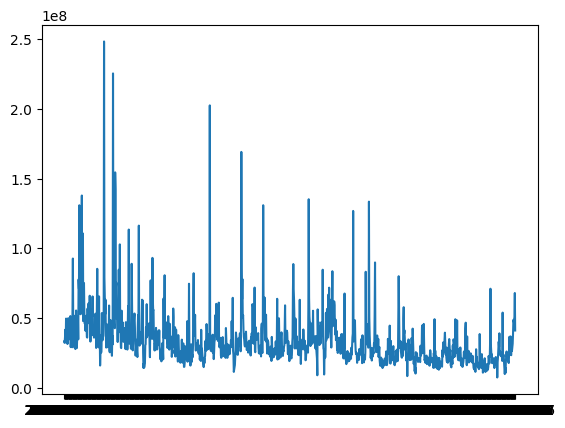

In [ ]:
plt.plot(microsoft['date'],
		microsoft['volume'])
plt.show()

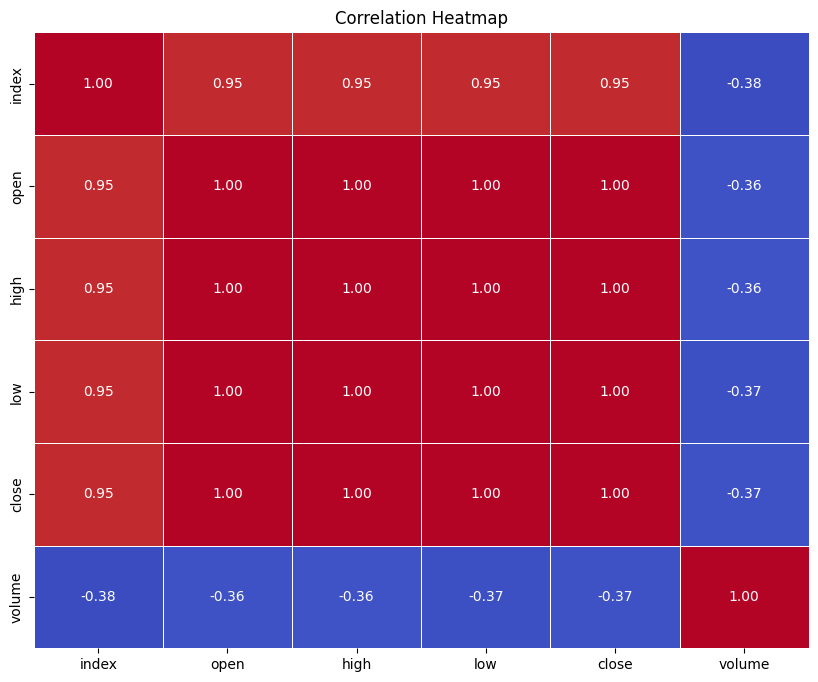

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'microsoft' is your DataFrame
# Filter only numeric columns
numeric_data = microsoft.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the figure

sns.heatmap(
    correlation_matrix,   # Compute the correlation matrix
    annot=True,           # Annotate cells with correlation coefficients
    cbar=False,           # Remove color bar for cleaner look
    cmap='coolwarm',     # Color map to use
    fmt='.2f',           # Format for annotation text
    linewidths=0.5       # Width of lines that divide cells
)

plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.show()  # Display the heatmap


Text(0.5, 1.0, 'Microsoft Stock Prices')

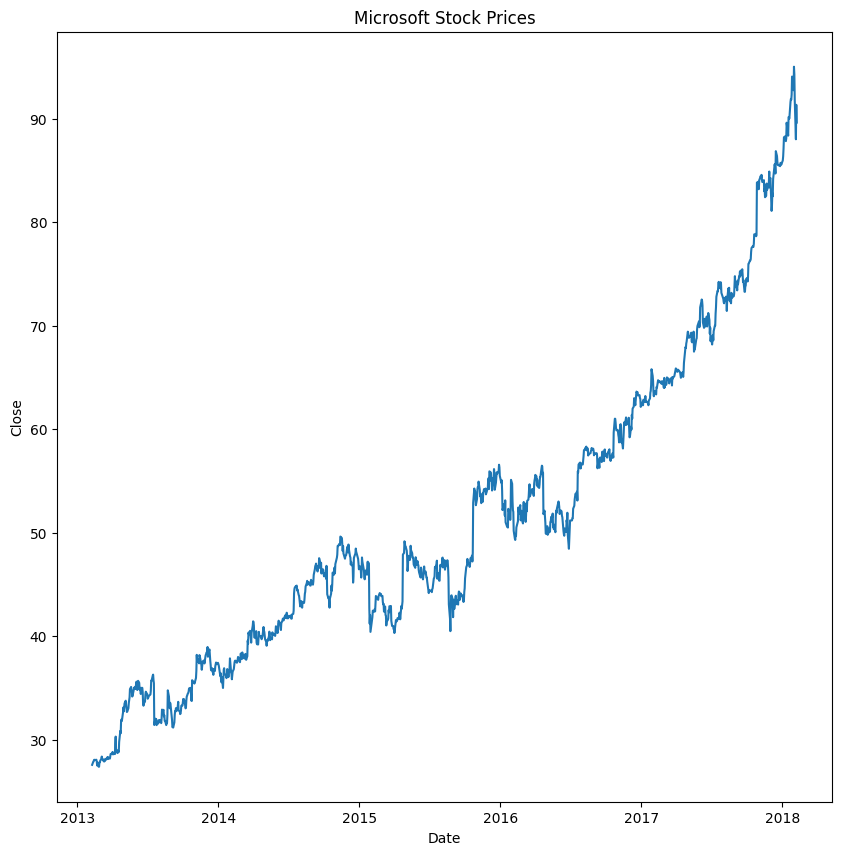

In [ ]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
							> datetime(2013, 1, 1))
							& (microsoft['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'microsoft' is your DataFrame and it contains a 'close' column

# Prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training_size = int(np.ceil(len(dataset) * 0.95))  # 95% for training

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Split the data into training set
train_data = scaled_data[0:training_size, :]

x_train = []
y_train = []

# Considering 60 as the batch size, create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shapes of x_train and y_train for verification
print(x_train.shape)
print(y_train.shape)


(1137, 60, 1)
(1137,)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
              = (x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
			loss='mae',
			metrics=RootMeanSquaredError())

history = model.fit(x_train, y_train,
					epochs=20)

Epoch 1/20
36/36 [==============================] - 8s 78ms/step - loss: 0.2186 - root_mean_squared_error: 0.3339
Epoch 2/20
36/36 [==============================] - 2s 56ms/step - loss: 0.1137 - root_mean_squared_error: 0.1556
Epoch 3/20
36/36 [==============================] - 2s 58ms/step - loss: 0.1008 - root_mean_squared_error: 0.1348
Epoch 4/20
36/36 [==============================] - 2s 58ms/step - loss: 0.0979 - root_mean_squared_error: 0.1315
Epoch 5/20
36/36 [==============================] - 3s 78ms/step - loss: 0.0915 - root_mean_squared_error: 0.1217
Epoch 6/20
36/36 [==============================] - 3s 93ms/step - loss: 0.0875 - root_mean_squared_error: 0.1171
Epoch 7/20
36/36 [==============================] - 2s 59ms/step - loss: 0.0916 - root_mean_squared_error: 0.1222
Epoch 8/20
36/36 [==============================] - 2s 57ms/step - loss: 0.0817 - root_mean_squared_error: 0.1095
Epoch 9/20
36/36 [==============================] - 2s 58ms/step - loss: 0.0881 - root_m

Epoch 1/10
36/36 [==============================] - 14s 56ms/step - loss: 0.0725
Epoch 2/10
36/36 [==============================] - 2s 49ms/step - loss: 0.0141
Epoch 3/10
36/36 [==============================] - 3s 80ms/step - loss: 0.0102
Epoch 4/10
36/36 [==============================] - 2s 59ms/step - loss: 0.0091
Epoch 5/10
36/36 [==============================] - 2s 49ms/step - loss: 0.0088
Epoch 6/10
36/36 [==============================] - 2s 49ms/step - loss: 0.0080
Epoch 7/10
36/36 [==============================] - 3s 95ms/step - loss: 0.0079
Epoch 8/10
36/36 [==============================] - 4s 103ms/step - loss: 0.0077
Epoch 9/10
36/36 [==============================] - 4s 105ms/step - loss: 0.0074
Epoch 10/10
2/2 [==============================] - 1s 19ms/step
(62, 60)
(62, 60, 1)
(62, 1)


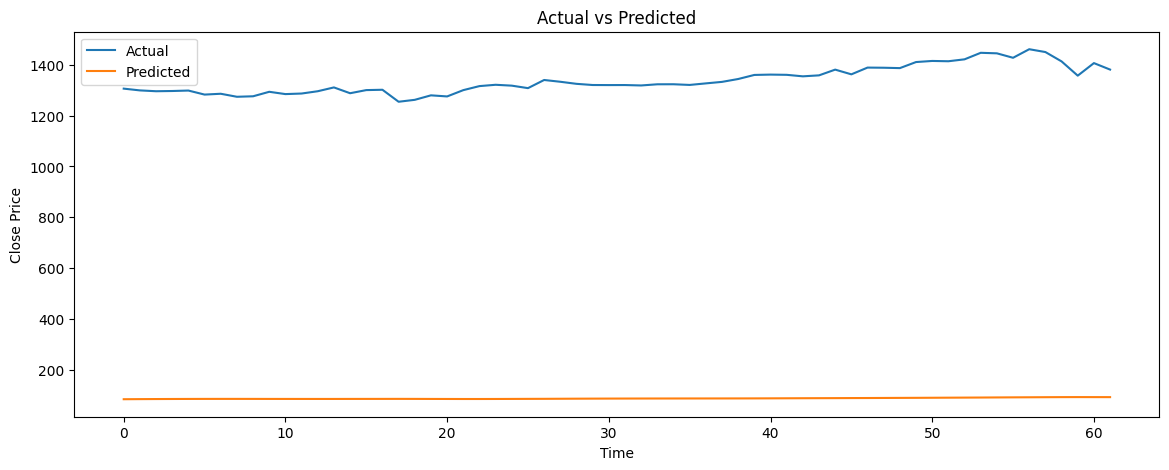

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'microsoft' is your DataFrame and it contains a 'close' column

# Prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training_size = int(np.ceil(len(dataset) * 0.95))  # 95% for training

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Split the data into training set
train_data = scaled_data[0:training_size, :]

x_train = []
y_train = []

# Considering 60 as the batch size, create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define and compile a simple LSTM model for demonstration purposes
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Prepare the test set samples
testing = scaled_data[training_size - 60:, :]  # Adjust to use scaled data
x_test = []
y_test = dataset[training_size:, :]  # y_test is the true values for the test set

# Create x_test using the same sequence length (60)
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

# Reshape x_test for LSTM (samples, time steps, features)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
pred = model.predict(X_test)

# Print the shapes of x_test, X_test, and pred for verification
print(x_test.shape)  # Expected output: (number_of_samples, 60)
print(X_test.shape)  # Expected output: (number_of_samples, 60, 1)
print(pred.shape)    # Expected output: (number_of_samples, 1)

# Optionally, you can inverse transform predictions and y_test if needed
pred_original_scale = scaler.inverse_transform(pred)
y_test_original_scale = scaler.inverse_transform(y_test)

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(pred_original_scale, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
